# Stock News Sentiment Analysis and visulaisation with Prediction
Group: Pycodes

In [357]:
# Loding Required Libareris 
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [358]:
# Url of the fiviz.com to scrape news article data.
web_url = 'https://finviz.com/quote.ashx?t='

In [411]:
# Getting input from the user
tickers = [input("Enter name : ")]

Enter name : bmo


In [412]:
#Getting the html code of finviz.com using BeautifulSoup and puting the response in news_tables  
news_tables = {}
for ticker in tickers:
    url = web_url + ticker
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    html = BeautifulSoup(response, 'html')
print(html)

<!DOCTYPE html>
<html>
<head>
<title>BMO Bank of Montreal Stock Quote</title>
<meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1024" name="viewport"/><meta content="Stock screener for investors and traders, financial visualizations." name="description"/>
<meta content="Stock Screener, Charts, Quotes, Maps, News, Financial Visualizations, Research, Trading Systems" name="keywords"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="no-cache" http-equiv="pragma"/>
<meta content="no-cache" http-equiv="cache-control"/>
<meta content="-1" http-equiv="Expires"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-700.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-900.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/inter-latin.woff2" rel="preload"/>
<lin

In [413]:
# Getting the news article table and puting it to news_tables
html1 = BeautifulSoup(response, features='html.parser')
news_table = html.find(id='news-table')
news_tables[ticker] = news_table
print (news_tables)

{'bmo': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Dec-08-21 04:57PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/bmo-investments-inc-announces-management-215700976.html" target="_blank">BMO Investments Inc. Announces Management Fee Reduction for BMO Lifestage Plus Funds</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> CNW Group</span></div></div></td></tr>
<tr><td align="right" style="white-space:nowrap" width="130">Dec-07-21 07:15AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/bank-montreal-bmo-stock-2-121512552.html" target="_blank">Bank of Montreal (BMO) Stock Up 2.7% as Q4 Earnings Rise Y/Y</a></div><div class="news-link-right"

In [414]:
# now parsing data in news_tables and arranging in ticker, date, time, title format and creating a dataframe of output
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')
        if len(date_data) == 1:
            time = date_data[0][0:7]
        else:
                date = datetime.datetime.strptime(date_data[0], '%b-%d-%y').strftime('%Y/%m/%d')
                time = date_data[1][0:7]
                parsed_data.append([ticker, date, time, title])
                df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
print (parsed_data)

[['bmo', '2021/12/08', '04:57PM', 'BMO Investments Inc. Announces Management Fee Reduction for BMO Lifestage Plus Funds'], ['bmo', '2021/12/07', '07:15AM', 'Bank of Montreal (BMO) Stock Up 2.7% as Q4 Earnings Rise Y/Y'], ['bmo', '2021/12/06', '02:16PM', 'Toronto-Dominion: Good Finish to a Strong Year'], ['bmo', '2021/12/03', '04:42PM', 'Bank Stocks Whipsaw Canadas Market With Higher Rates on Horizon'], ['bmo', '2021/12/02', '09:15AM', 'BMO Helps Boralex Go Beyond Renewable Energy, with the Transition of its Credit Facility to a Sustainability-Linked Loan'], ['bmo', '2021/12/01', '05:30PM', "BMO's investment chief just predicted a 17% stock market gain for 2022  ignore the bears and make room for these 3 'outperform' stocks"], ['bmo', '2021/11/30', '12:14PM', 'BMO Private Investment Counsel Inc. Announces Sub-Advisor Changes to BMO Private U.S. Equity Portfolio and BMO Private International Equity Portfolio'], ['bmo', '2021/11/29', '02:06PM', 'Bank of Montreal (BMO) Unveils Line-Up of C

In [415]:
print(df.head())

  ticker        date     time  \
0    bmo  2021/12/08  04:57PM   
1    bmo  2021/12/07  07:15AM   
2    bmo  2021/12/06  02:16PM   
3    bmo  2021/12/03  04:42PM   
4    bmo  2021/12/02  09:15AM   

                                               title  
0  BMO Investments Inc. Announces Management Fee ...  
1  Bank of Montreal (BMO) Stock Up 2.7% as Q4 Ear...  
2     Toronto-Dominion: Good Finish to a Strong Year  
3  Bank Stocks Whipsaw Canadas Market With Higher...  
4  BMO Helps Boralex Go Beyond Renewable Energy, ...  


In [416]:
# getting sentiment analyzer
vader = SentimentIntensityAnalyzer()

In [417]:
# Performing the sentiment analysis on title coloumn of the df which are the news article and printing compound values 
from nltk import tokenize

tricky_sentences = df['title']
sid = SentimentIntensityAnalyzer()
for sentence in tricky_sentences:
    #print(sentence)
    ss = vader.polarity_scores(sentence)
    print( ss['compound']*100 )

0.0
0.0
73.50999999999999
0.0
74.3
22.63
0.0
38.18
0.0
38.18
0.0
-42.15
36.120000000000005
73.50999999999999
27.32
-2.58
36.120000000000005
0.0
67.05
0.0
36.120000000000005
71.84
0.0
40.19
27.32
0.0
94.26
0.0
-42.15
7.720000000000001
0.0
-57.19
0.0
38.18
0.0
-10.27
31.819999999999997
-10.27
20.23
55.74
5.16
0.0
0.0
0.0
70.03
0.0
17.79


In [418]:
# creating df of the sentiment scores as scores_df
scores = df['title'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
scores_df

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.000,0.392,0.608,0.7351
3,0.000,1.000,0.000,0.0000
4,0.000,0.657,0.343,0.7430
5,0.100,0.763,0.137,0.2263
6,0.000,1.000,0.000,0.0000
7,0.000,0.755,0.245,0.3818
8,0.000,1.000,0.000,0.0000
9,0.000,0.833,0.167,0.3818


In [419]:

# Join the DataFrames of the news and the list of dicts
df = df.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
df['date'] = pd.to_datetime(df.date).dt.date

df

,ticker,date,time,title,neg,neu,pos,compound
0,bmo,2021-12-08,04:57PM,BMO Investments Inc. Announces Management Fee ...,0.000,1.000,0.000,0.0000
1,bmo,2021-12-07,07:15AM,Bank of Montreal (BMO) Stock Up 2.7% as Q4 Ear...,0.000,1.000,0.000,0.0000
2,bmo,2021-12-06,02:16PM,Toronto-Dominion: Good Finish to a Strong Year,0.000,0.392,0.608,0.7351
3,bmo,2021-12-03,04:42PM,Bank Stocks Whipsaw Canadas Market With Higher...,0.000,1.000,0.000,0.0000
4,bmo,2021-12-02,09:15AM,"BMO Helps Boralex Go Beyond Renewable Energy, ...",0.000,0.657,0.343,0.7430
5,bmo,2021-12-01,05:30PM,BMO's investment chief just predicted a 17% st...,0.100,0.763,0.137,0.2263
6,bmo,2021-11-30,12:14PM,BMO Private Investment Counsel Inc. Announces ...,0.000,1.000,0.000,0.0000
7,bmo,2021-11-29,02:06PM,Bank of Montreal (BMO) Unveils Line-Up of Cred...,0.000,0.755,0.245,0.3818
8,bmo,2021-11-26,05:30PM,Bank of Montreal Announces the Reverse Split o...,0.000,1.000,0.000,0.0000
9,bmo,2021-11-25,01:06PM,BMO Introduces the First World Elite Mastercar...,0.000,0.833,0.167,0.3818


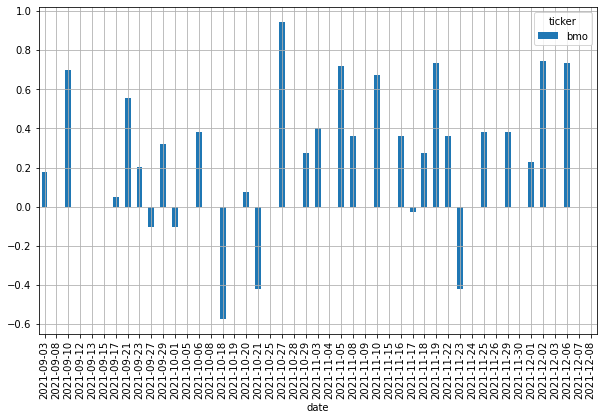

In [420]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = df.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [421]:

def sentiment_declareation(sentiment_value):
  if -0.2 < sentiment_value <= 0.2:
      return 'neu'
  elif 0.2 < sentiment_value <= 1.0:
      return 'pos'
  elif -1.0 <= sentiment_value <= -0.2:
      return 'neg'


In [422]:
df['Sentiment'] = df['compound'].apply(lambda value: sentiment_declareation(value))

In [423]:
df['date'] = pd.to_datetime(df.date).dt.date
df

,ticker,date,time,title,neg,neu,pos,compound,Sentiment
0,bmo,2021-12-08,04:57PM,BMO Investments Inc. Announces Management Fee ...,0.000,1.000,0.000,0.0000,neu
1,bmo,2021-12-07,07:15AM,Bank of Montreal (BMO) Stock Up 2.7% as Q4 Ear...,0.000,1.000,0.000,0.0000,neu
2,bmo,2021-12-06,02:16PM,Toronto-Dominion: Good Finish to a Strong Year,0.000,0.392,0.608,0.7351,pos
3,bmo,2021-12-03,04:42PM,Bank Stocks Whipsaw Canadas Market With Higher...,0.000,1.000,0.000,0.0000,neu
4,bmo,2021-12-02,09:15AM,"BMO Helps Boralex Go Beyond Renewable Energy, ...",0.000,0.657,0.343,0.7430,pos
5,bmo,2021-12-01,05:30PM,BMO's investment chief just predicted a 17% st...,0.100,0.763,0.137,0.2263,pos
6,bmo,2021-11-30,12:14PM,BMO Private Investment Counsel Inc. Announces ...,0.000,1.000,0.000,0.0000,neu
7,bmo,2021-11-29,02:06PM,Bank of Montreal (BMO) Unveils Line-Up of Cred...,0.000,0.755,0.245,0.3818,pos
8,bmo,2021-11-26,05:30PM,Bank of Montreal Announces the Reverse Split o...,0.000,1.000,0.000,0.0000,neu
9,bmo,2021-11-25,01:06PM,BMO Introduces the First World Elite Mastercar...,0.000,0.833,0.167,0.3818,pos


In [424]:
def percentage(part, whole):
  temp = 100 * float(part) / float(whole)
  return format(temp, '.2f')

In [425]:
def visualization(positive, neutral, negative):
  labels = ['Positive [' + str(positive) + '%]','Neutral [' + str(neutral) + '%]',
            'Negative [' + str(negative) + '%]']
  sizes = [positive, neutral, negative]
  colors = ['lightgreen', 'gold', 'red']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.title('Aggregate sentiment value of the economic news headlines')
  plt.legend(patches, labels, loc="best")
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2453388cc40>,
 'caps': [<matplotlib.lines.Line2D at 0x2452d3d3bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2453388cfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x245359892b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24535989220>],
 'means': []}

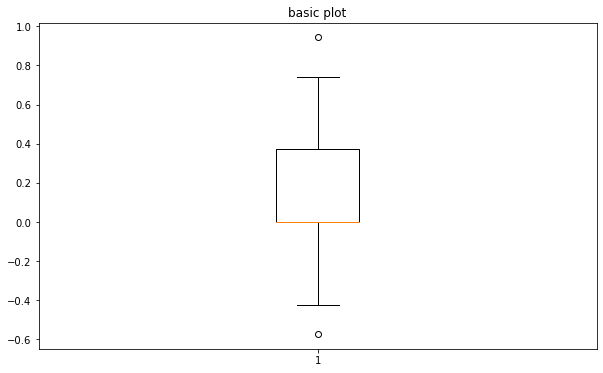

In [426]:
fig1, ax1 = plt.subplots()
ax1.set_title('basic plot')
ax1.boxplot(df['compound'])

In [427]:
sentiment_result = {}
for value in df['Sentiment']:
    if value in sentiment_result:
        if value == 'neu':
            sentiment_result['neu'] += 1
        elif value == 'pos':
            sentiment_result['pos'] += 1
        elif value == 'neg':
            sentiment_result['neg'] += 1
    else:
        sentiment_result[value] = 1

sentiment_result

{'neu': 24, 'pos': 20, 'neg': 3}

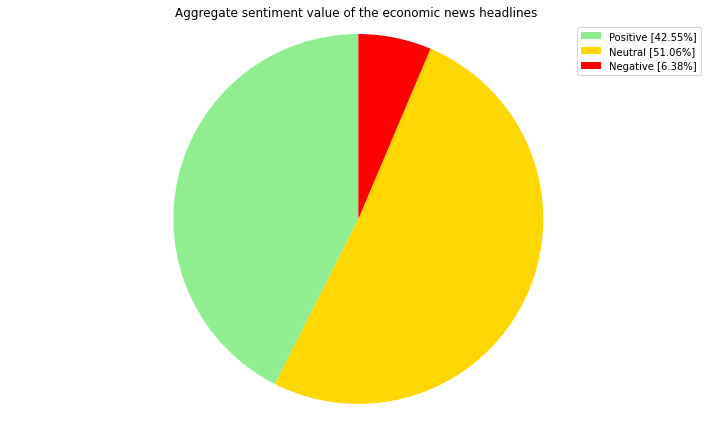

In [428]:

all_num = sentiment_result['pos'] + sentiment_result['neu'] + sentiment_result['neg']
pos_percent = percentage(part=sentiment_result['pos'], whole=all_num)
neu_percent = percentage(part=sentiment_result['neu'], whole=all_num)
neg_percent = percentage(part=sentiment_result['neg'], whole=all_num)


visualization(positive=pos_percent,neutral=neu_percent, negative=neg_percent)

# Importing Stock Data

In [429]:
#!pip install yfinance
import yfinance as yf
company_stock = yf.download(tickers=tickers,period='2mo',interval='1d')
company_stock.to_csv('stock.csv')
print(company_stock)

[*********************100%***********************]  1 of 1 completed


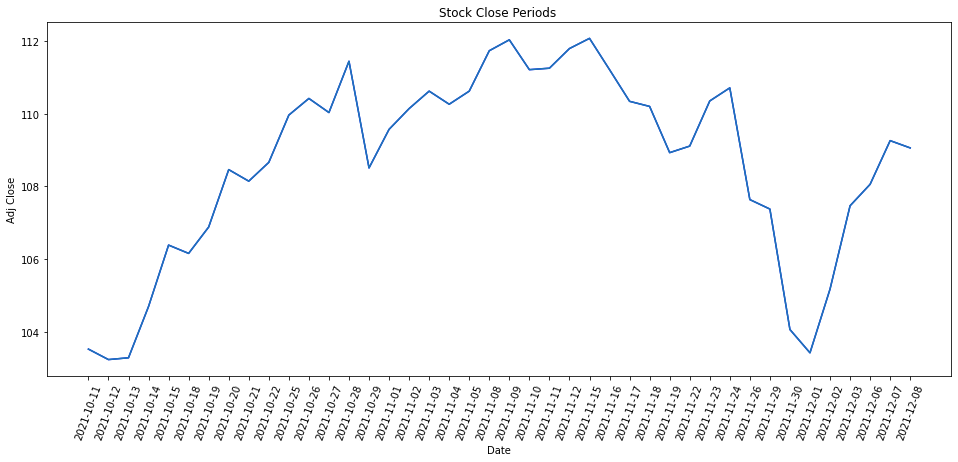

In [430]:

import pandas
df1 = pandas.read_csv('stock.csv')
#print(df1)

plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods ')
plt.plot(df1['Adj Close'], label='tickers', color = 'blue')
x = df1['Date']
y = df1['Adj Close']
plt.plot(x, y)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

# Stock sentiment ploting

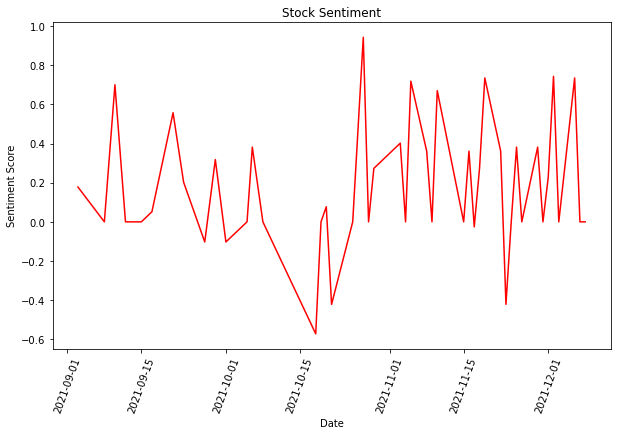

In [431]:
plt.title('Stock Sentiment')
x = df['date']
y = df['compound']
plt.plot(x, y, label=tickers , color = 'red')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

# preparing Data for the pridiction Model

In [432]:
df2 = df1[['Date', 'Adj Close']].copy()


In [433]:
df3 = df[['compound']].copy()

In [434]:
df4 = pd.concat([df2, df3], axis=1)
df4.fillna(method="pad")

,Date,Adj Close,compound
0,2021-10-11,103.531960,0.0000
1,2021-10-12,103.244179,0.0000
2,2021-10-13,103.293793,0.7351
3,2021-10-14,104.702934,0.0000
4,2021-10-15,106.389931,0.7430
5,2021-10-18,106.161697,0.2263
6,2021-10-19,106.886108,0.0000
7,2021-10-20,108.463951,0.3818
8,2021-10-21,108.146393,0.0000
9,2021-10-22,108.662415,0.3818


In [435]:
df4 = df4.fillna(method = 'pad')
df4

,Date,Adj Close,compound
0,2021-10-11,103.531960,0.0000
1,2021-10-12,103.244179,0.0000
2,2021-10-13,103.293793,0.7351
3,2021-10-14,104.702934,0.0000
4,2021-10-15,106.389931,0.7430
5,2021-10-18,106.161697,0.2263
6,2021-10-19,106.886108,0.0000
7,2021-10-20,108.463951,0.3818
8,2021-10-21,108.146393,0.0000
9,2021-10-22,108.662415,0.3818


In [436]:
import numpy as np
# This function "window_data" accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df4, window, feature_col_number1, feature_col_number2, target_col_number):
    # Create empty lists "X_close", "X_polarity", "X_volume" and y
    X_close = []
    X_polarity = []
    y = []
    for i in range(len(df4) - window):
        
        # Get close, ts_polarity, tw_vol, and target in the loop
        close = df4.iloc[i:(i + window), feature_col_number1]
        ts_polarity = df4.iloc[i:(i + window), feature_col_number2]
        
        target = df4.iloc[(i + window), target_col_number]
        
        # Append values in the lists
        X_close.append(close)
        X_polarity.append(ts_polarity)
    
        y.append(target)
        
    return np.hstack((X_close,X_polarity)), np.array(y).reshape(-1, 1)

In [437]:
window_size = 2

# Column index 0 is the `Adj Close` column
# Column index 1 is the `compound` column
feature_col_number1 = 2
feature_col_number2 = 1
target_col_number = 1
X, y = window_data(df4, window_size, feature_col_number1, feature_col_number2, target_col_number)

In [438]:
# Use 70% of the data for training and 30% for testing
X_split = int(0.8 * len(X))
y_split = int(0.8 * len(y))

# Set X_train, X_test, y_train, t_test
X_train = X[: X_split]
X_test = X[X_split:]
y_train = y[: y_split]
y_test = y[y_split:]

# Scaling Data with MinMaxScaler
We will use the MinMaxScaler from sklearn to scale all values between 0 and 1. Note that we scale both features and target sets.

In [439]:
from sklearn.preprocessing import MinMaxScaler

In [440]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

# Using Xgboost regressor for prediction

In [441]:
# Create the XG Boost regressor instance
#!pip install xgboost
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

In [442]:
# Fit the model
model.fit(X_train, y_train.ravel())


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Model Performance
In this section, we will evaluate the model using the test data.

We will:

Evaluate the model using the X_test and y_test data.
Use the X_test data to make predictions
Create a DataFrame of Real (y_test) vs predicted values.
Plot the Real vs predicted values as a line chart

In [443]:
# Make some predictions
predicted = model.predict(X_test)


In [444]:
# Evaluating the model

from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

Root Mean Squared Error: 0.14134426684347207
R-squared : 0.8036044522996323


In [445]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [446]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df4.index[-len(real_prices): ]) 
stocks

,Real,Predicted
38,107.470001,107.623528
39,108.059998,108.423843
40,109.260002,108.705055
41,109.059998,109.075958
42,109.059998,109.032333
43,109.059998,108.913612
44,109.059998,108.913612
45,109.059998,108.860413
46,109.059998,108.891266


In [447]:
s = df1[['Date']].copy()
s1 = pd.concat([s, stocks], axis=1)
s1.dropna(inplace=True)
s1

,Date,Real,Predicted
38,2021-12-03,107.470001,107.623528
39,2021-12-06,108.059998,108.423843
40,2021-12-07,109.260002,108.705055
41,2021-12-08,109.059998,109.075958


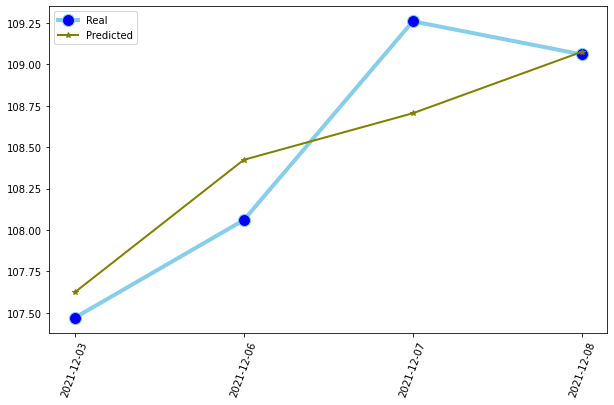

Accuracy :  75.0


In [448]:

# multiple line plots
plt.plot( 'Date', 'Real', data=s1, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'Predicted', data=s1, marker='*', color='olive', linewidth=2)

plt.xticks(rotation=70)
# show legend
plt.legend()

# show graph
plt.show()
from sklearn.metrics import accuracy_score
x = s1['Real']
y = s1['Predicted']
x= x.astype('int64')
y= y.astype('int64')
print ("Accuracy : ", accuracy_score(x, y)*100)


In [455]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
def importdata():
    balance_data = df4
    # Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
      
    # Printing the dataset obseravtions
    print ("Dataset: ",balance_data.head())
    return balance_data
def splitdataset(balance_data):
  
    # Separating the target variable
    feature_cols = (['compound','Adj Close']*100)
    X = df4[feature_cols] # Features
    Y = df4['Adj Close'] # Target variabl
    X = X.astype('int64')
    Y = Y.astype('int64')
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.2, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
  
# Driver code
def main():
      
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      # Calling main function
if __name__=="__main__":
    main()


Dataset Length:  47
Dataset Shape:  (47, 3)
Dataset:           Date   Adj Close  compound
0  2021-10-11  103.531960    0.0000
1  2021-10-12  103.244179    0.0000
2  2021-10-13  103.293793    0.7351
3  2021-10-14  104.702934    0.0000
4  2021-10-15  106.389931    0.7430
Results Using Gini Index:
Predicted values:
[103 110 111 109 109 109 103 108 110 103]
Confusion Matrix:  [[0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1]]
Accuracy :  70.0
Report :                precision    recall  f1-score   support

         103       0.00      0.00      0.00         0
         106       0.00      0.00      0.00         2
         107       0.00      0.00      0.00         1
         108       1.00      1.00      1.00         1
         109       1.00      1.00      1.00         3
         110       1.00      1.00      1.00         2
         111       1.00      1.00      1.00         1

    accuracy                           0.70 

C:\Users\jcp95\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcp95\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcp95\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcp95\anaconda3\lib\site-packages\sklearn\metrics\_cla